# GOOGLE Stock Price Prediction using LSTM

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense,LSTM,Dropout

In [2]:
df = pd.read_csv("/content/GoogleStock Price.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,2013-01-03,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2013-01-04,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,2013-01-07,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,2013-01-08,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


## Data Preprocessing

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [7]:
df.shape

(2645, 7)

In [12]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2644
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2645 non-null   datetime64[ns]
 1   Open       2645 non-null   float64       
 2   High       2645 non-null   float64       
 3   Low        2645 non-null   float64       
 4   Close      2645 non-null   float64       
 5   Adj Close  2645 non-null   float64       
 6   Volume     2645 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 165.3 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

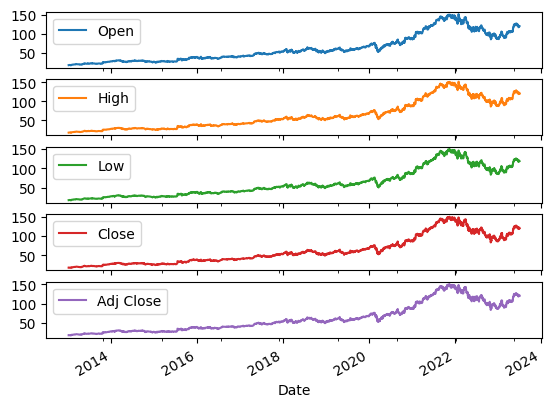

In [14]:
df.set_index('Date')[['Open','High','Low','Close',"Adj Close"]].plot(subplots = True)

## Taking features for prediction

In [26]:
df_input = df.drop(["Volume",'Date'],axis = 1)

In [27]:
df_input.head()

,Open,High,Low,Close,Adj Close
0,18.003504,18.193193,17.931683,18.099348,18.099348
1,18.141392,18.316566,18.036036,18.109859,18.109859
2,18.251753,18.555305,18.210211,18.467718,18.467718
3,18.404655,18.503002,18.282784,18.387136,18.387136
4,18.406906,18.425926,18.128880,18.350851,18.350851


In [28]:
df_input.describe()

,Open,High,Low,Close,Adj Close
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
mean,61.723041,62.368079,61.083765,61.744100,61.744100
std,35.298521,35.738101,34.873546,35.312279,35.312279
min,17.634134,17.651152,17.405405,17.589338,17.589338
25%,32.872002,33.205002,32.536499,32.849499,32.849499
50%,53.195000,53.799000,52.596001,53.292500,53.292500
75%,86.337997,87.341499,85.509003,86.380997,86.380997
max,151.250000,151.546494,148.899002,149.838501,149.838501


## Standardization of Data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
data_scaled = scaler.fit_transform(df_input)

In [32]:
data_scaled

array([[0.00276441, 0.00404825, 0.00400231, 0.00385643, 0.00385643],
       [0.00379639, 0.00496966, 0.0047959 , 0.00393591, 0.00393591],
       [0.00462234, 0.00675269, 0.00612049, 0.00664186, 0.00664186],
       ...,
       [0.76043263, 0.76581343, 0.7712512 , 0.7736205 , 0.7736205 ],
       [0.76043263, 0.78388723, 0.77436925, 0.78760923, 0.78760923],
       [0.76462378, 0.76663497, 0.76805714, 0.7752084 , 0.7752084 ]])

## Data Distribution
 * Features = Data that is used for prediction
 * Traning = The Data which is to be predicted

In [34]:
features = data_scaled
target = data_scaled[:,1]

In [35]:
target

array([0.00404825, 0.00496966, 0.00675269, ..., 0.76581343, 0.78388723,
       0.76663497])

## Train - Test - Split

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features,target,test_size = 0.2,shuffle  =False)   # shuffle = Flase is important because it is a time series data and order is important

In [38]:
from keras.preprocessing.sequence import TimeseriesGenerator
win_length = 14
batch_size = 32
num_features = 5
train_generator = TimeseriesGenerator(x_train,y_train,length= win_length,sampling_rate = 1,batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length= win_length,sampling_rate = 1,batch_size = batch_size)


## Defining the model


In [39]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape = (win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(16,return_sequences=True))
model.add(tf.keras.layers.Dense(1))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           68608     
                                                                 
 lstm_1 (LSTM)               (None, 14, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 14, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 32)            12416     
                                                                 
 dropout_1 (Dropout)         (None, 14, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 16)            3136      
                                                                 
 dense (Dense)               (None, 14, 1)             1

In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(loss = tf.losses.MeanSquaredError(),optimizer = tf.optimizers.Adam(),metrics= [tf.metrics.MeanAbsoluteError()])


## Model Training

In [44]:
history = model.fit_generator(train_generator,epochs = 50,validation_data = test_generator,shuffle = False,callbacks = [early_stopping])

Epoch 1/50


<ipython-input-44-1ce2586a68b7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs = 50,validation_data = test_generator,shuffle = False,callbacks = [early_stopping])


66/66 [==============================] - 9s 50ms/step - loss: 0.0094 - mean_absolute_error: 0.0671 - val_loss: 0.0488 - val_mean_absolute_error: 0.1549
Epoch 2/50
66/66 [==============================] - 3s 42ms/step - loss: 0.0078 - mean_absolute_error: 0.0612 - val_loss: 0.0388 - val_mean_absolute_error: 0.1439
Epoch 3/50
66/66 [==============================] - 2s 32ms/step - loss: 0.0060 - mean_absolute_error: 0.0604 - val_loss: 0.0251 - val_mean_absolute_error: 0.0992
Epoch 4/50
66/66 [==============================] - 2s 31ms/step - loss: 0.0044 - mean_absolute_error: 0.0475 - val_loss: 0.0173 - val_mean_absolute_error: 0.0820
Epoch 5/50
66/66 [==============================] - 3s 44ms/step - loss: 0.0022 - mean_absolute_error: 0.0307 - val_loss: 0.0114 - val_mean_absolute_error: 0.0753
Epoch 6/50
66/66 [==============================] - 3s 38ms/step - loss: 0.0016 - mean_absolute_error: 0.0268 - val_loss: 0.0088 - val_mean_absolute_error: 0.0763
Epoch 7/50
66/66 [===============

## Vizualisation of the loss and errors

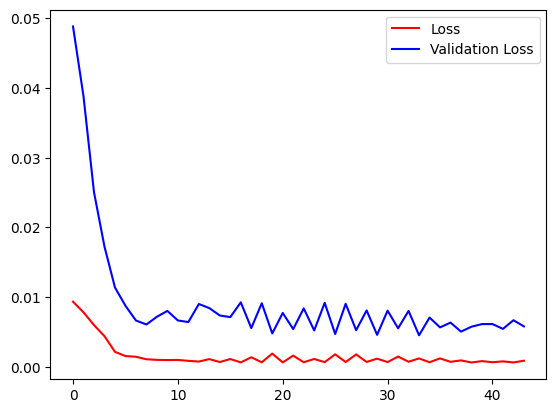

In [49]:
plt.plot(history.history['loss'],color = 'r',label = "Loss")
plt.plot(history.history['val_loss'],color = 'b',label = "Validation Loss")
plt.legend()
plt.show()

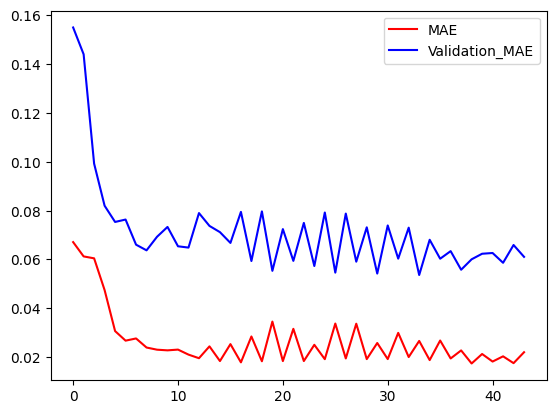

In [50]:
plt.plot(history.history['mean_absolute_error'],color = 'r',label = "MAE")
plt.plot(history.history['val_mean_absolute_error'],color = 'b',label = "Validation_MAE")
plt.legend()
plt.show()